# Remote Work vs Travel Data

In [1]:
# Imports:
import pprint, json, csv, os.path as path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests 


In [2]:
allcrimedata = pd.read_csv("resources/crime.csv")
allcrimedata

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,1/8/2020 0:00,1/8/2020 0:00,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,1/2/2020 0:00,1/1/2020 0:00,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,4/14/2020 0:00,2/13/2020 0:00,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,1/1/2020 0:00,1/1/2020 0:00,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,1/1/2020 0:00,1/1/2020 0:00,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834315,231604807,1/27/2023 0:00,1/26/2023 0:00,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
834316,231606525,3/22/2023 0:00,3/22/2023 0:00,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
834317,231210064,4/12/2023 0:00,4/12/2023 0:00,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
834318,230115220,7/2/2023 0:00,7/1/2023 0:00,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


In [3]:
allcrimedata["DATE OCC"]=pd.to_datetime(allcrimedata["DATE OCC"])
allcrimedata["Date Rptd"]=pd.to_datetime(allcrimedata["Date Rptd"])
allcrimedata['Year Crime Occured'] = allcrimedata['DATE OCC'].dt.year
allcrimedata = allcrimedata[allcrimedata['Year Crime Occured'].between(2020,2022)]
#automatically dropped 2023 data
allcrimedata

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Crime Occured
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,2020
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643146,221017286,2022-12-05,2022-12-01,1800,10,West Valley,1047,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,Invest Cont,331.0,NaN,NaN,NaN,17200 BURBANK BL,NaN,34.1722,-118.5077,2022
643147,221005507,2022-02-10,2022-02-09,1530,10,West Valley,1024,1,510,VEHICLE - STOLEN,...,Invest Cont,510.0,NaN,NaN,NaN,18800 SHERMAN WY,NaN,34.2011,-118.5426,2022
643148,221105477,2022-02-10,2022-02-08,2000,11,Northeast,1171,1,510,VEHICLE - STOLEN,...,Invest Cont,510.0,NaN,NaN,NaN,4000 FOUNTAIN AV,NaN,34.0958,-118.2787,2022
643149,221605448,2022-02-15,2022-02-14,1800,16,Foothill,1613,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,Invest Cont,331.0,NaN,NaN,NaN,12700 VAN NUYS BL,NaN,34.2755,-118.4092,2022


In [4]:
crime_data_2020 = allcrimedata.loc[(allcrimedata['DATE OCC'] >= '2020-01-01')
                     & (allcrimedata['DATE OCC'] < '2020-12-31')]
crime_data_2020

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Crime Occured
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,2020
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199444,230319020,2023-10-15,2020-06-04,1300,3,Southwest,317,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,Invest Cont,440.0,NaN,NaN,NaN,1400 W ADAMS BL,NaN,34.0349,-118.2959,2020
199445,200114097,2020-06-29,2020-06-29,700,1,Central,128,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,300 E 1ST ST,NaN,34.0504,-118.2409,2020
199446,201816432,2020-08-30,2020-08-30,2330,18,Southeast,1861,1,815,SEXUAL PENETRATION W/FOREIGN OBJECT,...,Adult Other,815.0,NaN,NaN,NaN,11400 MENLO AV,NaN,33.9310,-118.2893,2020
199447,200121738,2020-11-30,2020-11-30,815,1,Central,119,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,Adult Arrest,930.0,NaN,NaN,NaN,RAMIREZ,VIGNES,34.0551,-118.2322,2020


In [5]:
crime_data_2020.to_csv("Resources/crime_data_2020")

In [12]:
crime_data_2021 = allcrimedata.loc[(allcrimedata['DATE OCC'] >= '2021-01-01')
                     & (allcrimedata['DATE OCC'] < '2021-12-31')]
crime_data_2021

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Crime Occured
129229,212005799,2021-02-21,2021-02-20,1900,20,Olympic,2004,1,510,VEHICLE - STOLEN,...,Invest Cont,510.0,NaN,NaN,NaN,500 N WESTERN AV,NaN,34.0802,-118.3091,2021
129506,211413827,2021-06-23,2021-06-23,238,14,Pacific,1467,1,510,VEHICLE - STOLEN,...,Invest Cont,510.0,NaN,NaN,NaN,5700 W 74TH ST,NaN,33.9714,-118.3803,2021
129868,211310282,2021-05-27,2021-05-26,1500,13,Newton,1394,1,510,VEHICLE - STOLEN,...,Invest Cont,510.0,NaN,NaN,NaN,6700 S MAIN ST,NaN,33.9784,-118.2739,2021
130006,210104477,2021-01-12,2021-01-11,1730,1,Central,159,1,510,VEHICLE - STOLEN,...,Invest Cont,510.0,NaN,NaN,NaN,1800 INDUSTRIAL ST,NaN,34.0357,-118.2324,2021
130254,212013279,2021-08-21,2021-08-20,30,20,Olympic,2027,1,510,VEHICLE - STOLEN,...,Invest Cont,510.0,NaN,NaN,NaN,3400 W 5TH ST,NaN,34.0654,-118.2941,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408835,211421071,2021-11-07,2021-11-07,100,14,Pacific,1431,1,761,BRANDISH WEAPON,...,Invest Cont,761.0,NaN,NaN,NaN,00 WINDWARD AV,NaN,33.9873,-118.4729,2021
408836,210516671,2021-12-01,2021-12-01,1430,5,Harbor,585,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Adult Other,740.0,NaN,NaN,NaN,1900 S GRAND AV,NaN,33.7270,-118.2902,2021
408837,210217231,2021-11-06,2021-11-05,2300,2,Rampart,235,1,510,VEHICLE - STOLEN,...,Invest Cont,510.0,NaN,NaN,NaN,2300 MIRAMAR ST,NaN,34.0649,-118.2741,2021
408838,210312887,2021-07-12,2021-07-12,1200,3,Southwest,363,1,350,"THEFT, PERSON",...,Invest Cont,350.0,NaN,NaN,NaN,CRENSHAW BL,STOCKER ST,34.0088,-118.3351,2021


In [7]:
crime_data_2021.to_csv("Resources/crime_data_2021")

In [16]:
crime_data_2022 = allcrimedata.loc[(allcrimedata['DATE OCC'] >= '2022-01-01')
                     & (allcrimedata['DATE OCC'] < '2022-12-31')]
crime_data_2022

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Crime Occured
408840,220216262,2022-09-08,2022-09-08,1445,2,Rampart,275,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1000 S BURLINGTON AV,NaN,34.0502,-118.2765,2022
408841,221809626,2022-04-23,2022-04-22,2100,18,Southeast,1862,1,510,VEHICLE - STOLEN,...,Invest Cont,510.0,NaN,NaN,NaN,SAN PEDRO ST,120TH ST,33.9237,-118.2696,2022
408842,221711121,2022-07-10,2022-07-10,200,17,Devonshire,1781,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,NaN,NaN,NaN,8800 OSO AV,NaN,34.2299,-118.5754,2022
408843,220805283,2022-01-24,2022-01-22,1445,8,West LA,855,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,Invest Cont,341.0,NaN,NaN,NaN,1600 CAMDEN AV,NaN,34.0501,-118.4439,2022
408844,221821212,2022-11-27,2022-11-27,1635,18,Southeast,1826,1,210,ROBBERY,...,Invest Cont,210.0,NaN,NaN,NaN,91ST,COMPTON,33.9543,-118.2475,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643146,221017286,2022-12-05,2022-12-01,1800,10,West Valley,1047,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,Invest Cont,331.0,NaN,NaN,NaN,17200 BURBANK BL,NaN,34.1722,-118.5077,2022
643147,221005507,2022-02-10,2022-02-09,1530,10,West Valley,1024,1,510,VEHICLE - STOLEN,...,Invest Cont,510.0,NaN,NaN,NaN,18800 SHERMAN WY,NaN,34.2011,-118.5426,2022
643148,221105477,2022-02-10,2022-02-08,2000,11,Northeast,1171,1,510,VEHICLE - STOLEN,...,Invest Cont,510.0,NaN,NaN,NaN,4000 FOUNTAIN AV,NaN,34.0958,-118.2787,2022
643149,221605448,2022-02-15,2022-02-14,1800,16,Foothill,1613,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,Invest Cont,331.0,NaN,NaN,NaN,12700 VAN NUYS BL,NaN,34.2755,-118.4092,2022


In [32]:
crime_data_2022.to_csv("Resources/crime_data_2022")

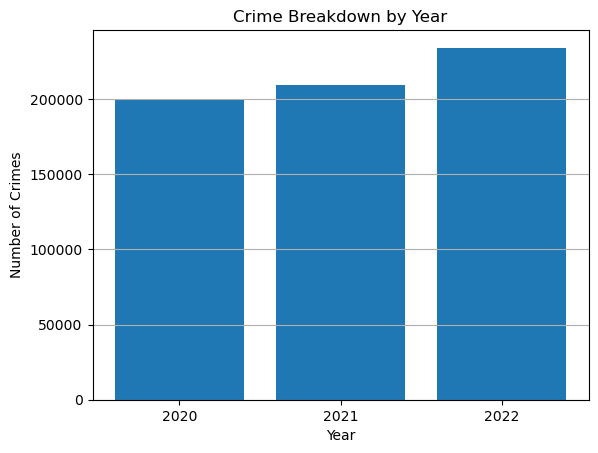

In [6]:
x = allcrimedata.groupby('Year Crime Occured',as_index=False).count()
y = x[['Year Crime Occured', 'DR_NO']].sort_values(by='Year Crime Occured')

plt.bar(x['Year Crime Occured'], y['DR_NO'])
plt.title("Crime Breakdown by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks([2020, 2021, 2022])
plt.grid(axis='y')
plt.show()

In [7]:
crime_data_2020['Month Crime Occured'] = crime_data_2020['DATE OCC'].dt.month
crime2020 = crime_data_2020[crime_data_2020['Month Crime Occured'].between(1,12)]
crime2020

C:\Users\samca\AppData\Local\Temp\ipykernel_26124\2864376885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_2020['Month Crime Occured'] = crime_data_2020['DATE OCC'].dt.month


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Crime Occured,Month Crime Occured
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020,1
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020,1
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,2020,2
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020,1
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199444,230319020,2023-10-15,2020-06-04,1300,3,Southwest,317,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,440.0,NaN,NaN,NaN,1400 W ADAMS BL,NaN,34.0349,-118.2959,2020,6
199445,200114097,2020-06-29,2020-06-29,700,1,Central,128,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,NaN,NaN,NaN,300 E 1ST ST,NaN,34.0504,-118.2409,2020,6
199446,201816432,2020-08-30,2020-08-30,2330,18,Southeast,1861,1,815,SEXUAL PENETRATION W/FOREIGN OBJECT,...,815.0,NaN,NaN,NaN,11400 MENLO AV,NaN,33.9310,-118.2893,2020,8
199447,200121738,2020-11-30,2020-11-30,815,1,Central,119,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,930.0,NaN,NaN,NaN,RAMIREZ,VIGNES,34.0551,-118.2322,2020,11


In [13]:
crime_data_2021['Month Crime Occured'] = crime_data_2021['DATE OCC'].dt.month
crime2021 = crime_data_2021[crime_data_2021['Month Crime Occured'].between(1,12)]
crime2021

C:\Users\samca\AppData\Local\Temp\ipykernel_26124\1751072156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_2021['Month Crime Occured'] = crime_data_2021['DATE OCC'].dt.month


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Crime Occured,Month Crime Occured
129229,212005799,2021-02-21,2021-02-20,1900,20,Olympic,2004,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,500 N WESTERN AV,NaN,34.0802,-118.3091,2021,2
129506,211413827,2021-06-23,2021-06-23,238,14,Pacific,1467,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,5700 W 74TH ST,NaN,33.9714,-118.3803,2021,6
129868,211310282,2021-05-27,2021-05-26,1500,13,Newton,1394,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,6700 S MAIN ST,NaN,33.9784,-118.2739,2021,5
130006,210104477,2021-01-12,2021-01-11,1730,1,Central,159,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,1800 INDUSTRIAL ST,NaN,34.0357,-118.2324,2021,1
130254,212013279,2021-08-21,2021-08-20,30,20,Olympic,2027,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,3400 W 5TH ST,NaN,34.0654,-118.2941,2021,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408835,211421071,2021-11-07,2021-11-07,100,14,Pacific,1431,1,761,BRANDISH WEAPON,...,761.0,NaN,NaN,NaN,00 WINDWARD AV,NaN,33.9873,-118.4729,2021,11
408836,210516671,2021-12-01,2021-12-01,1430,5,Harbor,585,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,NaN,NaN,NaN,1900 S GRAND AV,NaN,33.7270,-118.2902,2021,12
408837,210217231,2021-11-06,2021-11-05,2300,2,Rampart,235,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,2300 MIRAMAR ST,NaN,34.0649,-118.2741,2021,11
408838,210312887,2021-07-12,2021-07-12,1200,3,Southwest,363,1,350,"THEFT, PERSON",...,350.0,NaN,NaN,NaN,CRENSHAW BL,STOCKER ST,34.0088,-118.3351,2021,7


In [17]:
crime_data_2022['Month Crime Occured'] = crime_data_2022['DATE OCC'].dt.month
crime2022= crime_data_2022[crime_data_2022['Month Crime Occured'].between(1,12)]
crime2022

C:\Users\samca\AppData\Local\Temp\ipykernel_26124\3406697961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_2022['Month Crime Occured'] = crime_data_2022['DATE OCC'].dt.month


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Crime Occured,Month Crime Occured
408840,220216262,2022-09-08,2022-09-08,1445,2,Rampart,275,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,1000 S BURLINGTON AV,NaN,34.0502,-118.2765,2022,9
408841,221809626,2022-04-23,2022-04-22,2100,18,Southeast,1862,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,SAN PEDRO ST,120TH ST,33.9237,-118.2696,2022,4
408842,221711121,2022-07-10,2022-07-10,200,17,Devonshire,1781,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,230.0,NaN,NaN,NaN,8800 OSO AV,NaN,34.2299,-118.5754,2022,7
408843,220805283,2022-01-24,2022-01-22,1445,8,West LA,855,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,341.0,NaN,NaN,NaN,1600 CAMDEN AV,NaN,34.0501,-118.4439,2022,1
408844,221821212,2022-11-27,2022-11-27,1635,18,Southeast,1826,1,210,ROBBERY,...,210.0,NaN,NaN,NaN,91ST,COMPTON,33.9543,-118.2475,2022,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643146,221017286,2022-12-05,2022-12-01,1800,10,West Valley,1047,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,331.0,NaN,NaN,NaN,17200 BURBANK BL,NaN,34.1722,-118.5077,2022,12
643147,221005507,2022-02-10,2022-02-09,1530,10,West Valley,1024,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,18800 SHERMAN WY,NaN,34.2011,-118.5426,2022,2
643148,221105477,2022-02-10,2022-02-08,2000,11,Northeast,1171,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,4000 FOUNTAIN AV,NaN,34.0958,-118.2787,2022,2
643149,221605448,2022-02-15,2022-02-14,1800,16,Foothill,1613,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,331.0,NaN,NaN,NaN,12700 VAN NUYS BL,NaN,34.2755,-118.4092,2022,2


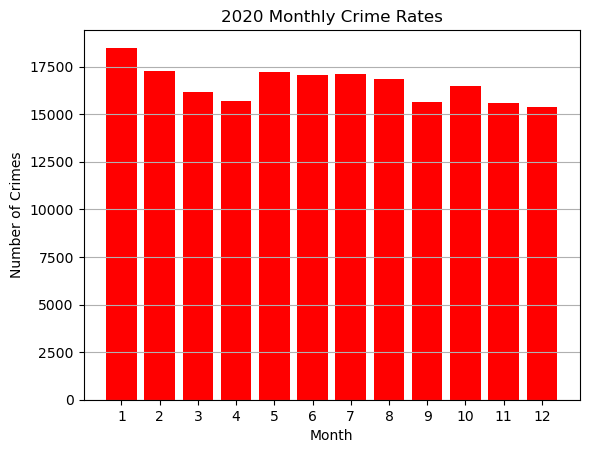

In [10]:
x = crime2020.groupby('Month Crime Occured',as_index=False).count()
y = x[['Month Crime Occured', 'DR_NO']].sort_values(by='Month Crime Occured')

plt.bar(x['Month Crime Occured'], y['DR_NO'], color='red')
plt.title("2020 Monthly Crime Rates")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(axis='y')
plt.show()

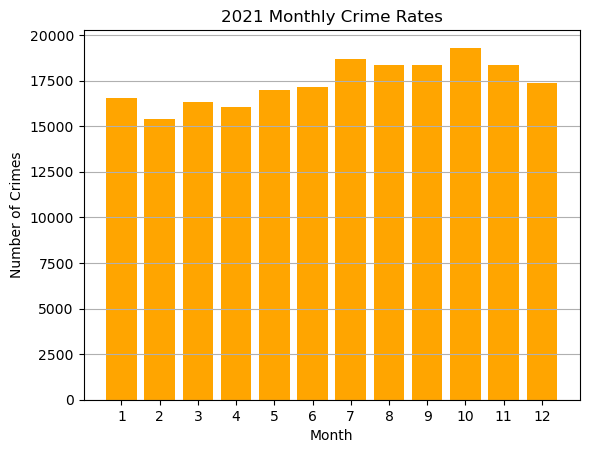

In [15]:
x = crime2021.groupby('Month Crime Occured',as_index=False).count()
y = x[['Month Crime Occured', 'DR_NO']].sort_values(by='Month Crime Occured')

plt.bar(x['Month Crime Occured'], y['DR_NO'], color='orange')
plt.title("2021 Monthly Crime Rates")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(axis='y')
plt.show()

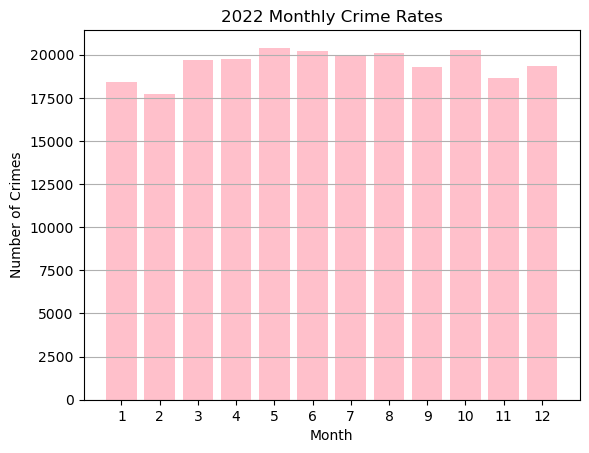

In [18]:
x = crime2022.groupby('Month Crime Occured',as_index=False).count()
y = x[['Month Crime Occured', 'DR_NO']].sort_values(by='Month Crime Occured')

plt.bar(x['Month Crime Occured'], y['DR_NO'], color='pink')
plt.title("2022 Monthly Crime Rates")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(axis='y')
plt.show()